<a href="https://www.kaggle.com/code/eavprog/abscur-reyting-dohod?scriptVersionId=124335610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг абсолютной доходности для проекта "Абсолютные валютные курсы"

[**Оглавление проекта "Абсолютные валютные курсы"**](https://docs.google.com/spreadsheets/d/1UgC2NfKtKJPaXglsmVJET7Xnp2ZtOzJgKD9DN-VGFA8/edit#gid=77497797)

Данные для настоящего расчета берутся из тетрадки [**Источник данных для проекта "Абсолютные валютные курсы"**](https://www.kaggle.com/code/eavprog/abscur-data).

Настоящий расчет показывает относительное изменение (в процентах) абсолютных валютных курсов за разные периоды (неделя, месяц, квартал и т.д.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import abscur_post as ap
import abscur_menu
abscur_menu.print_menu()

data_abs = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)
# data_abs.last("15d")

cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

img_cnt = 0
tabs = []
period = []

def rep(per,title_per):
    global img_cnt,tabs,period
    res = data_abs.asfreq(freq="D",method="pad").pct_change(per).last("D").transpose()*100
    res.columns = ['%']
    res.sort_values('%',ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг доходности за "+title_per+" c "+datetime.datetime.strftime(data_abs.asfreq(freq="D").index[-per],"%Y-%m-%d")+" по "+datetime.datetime.strftime(data_abs.index[-1],"%Y-%m-%d"),ylabel="%",legend=False,figsize=(15,5))
    plt.savefig(str(img_cnt) + ".png")
    img_cnt += 1
    plt.show()
    
    def make_clickable(val):
        if val == '...':
            return '...'
        return '<a target="_blank" href="{}">Wikipedia link</a>'.format(val)
    
    res = res.merge(cur_ras,left_index=True,right_index=True)
    
    res = pd.concat([res.iloc[:3,:],pd.DataFrame([{'%':'...','Расшифровка':'...','Ссылка на Wikipedia':'...'}],index=['...']),res.iloc[-3:,:]]).style.format({'Ссылка на Wikipedia': make_clickable})
    
    tabs.append(res)
    period.append(title_per)
    
    return res

# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/u/262921-aleksey-enin)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# Неделя
Относительное изменение (в процентах) абсолютных валютных курсов за неделю.

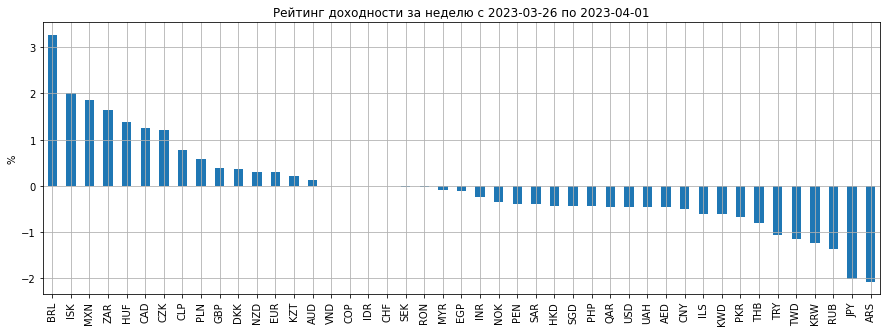

,%,Расшифровка,Ссылка на Wikipedia
BRL,3.275087,Бразильский реал,Wikipedia link
ISK,2.010724,Исландская крона,Wikipedia link
MXN,1.860053,Мексиканское песо,Wikipedia link
...,...,...,...
RUB,-1.374443,Российский рубль,Wikipedia link
JPY,-2.012579,Японская иена,Wikipedia link
ARS,-2.075099,Аргентинское песо,Wikipedia link


In [2]:
rep(7,"неделю")

# Месяц
Относительное изменение (в процентах) абсолютных валютных курсов за месяц.

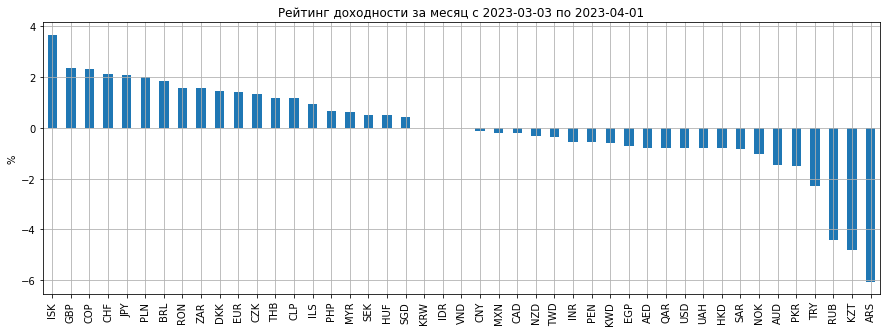

,%,Расшифровка,Ссылка на Wikipedia
ISK,3.678474,Исландская крона,Wikipedia link
GBP,2.374950,Фунт стерлингов,Wikipedia link
COP,2.325581,Колумбийское песо,Wikipedia link
...,...,...,...
RUB,-4.427646,Российский рубль,Wikipedia link
KZT,-4.801670,Казахстанский тенге,Wikipedia link
ARS,-6.066351,Аргентинское песо,Wikipedia link


In [3]:
rep(30,"месяц")

# Квартал
Относительное изменение (в процентах) абсолютных валютных курсов за квартал.

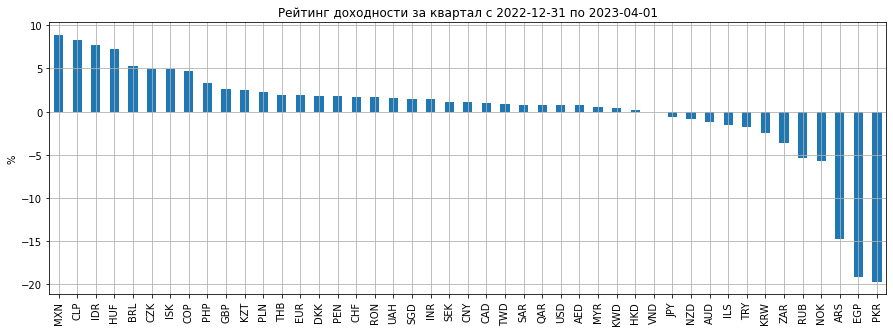

,%,Расшифровка,Ссылка на Wikipedia
MXN,8.922144,Мексиканское песо,Wikipedia link
CLP,8.333333,Чилийское песо,Wikipedia link
IDR,7.692308,Индонезийская рупия,Wikipedia link
...,...,...,...
ARS,-14.789338,Аргентинское песо,Wikipedia link
EGP,-19.118530,Египетский фунт,Wikipedia link
PKR,-19.691969,Пакистанская рупия,Wikipedia link


In [4]:
rep(92,"квартал")

# Полгода
Относительное изменение (в процентах) абсолютных валютных курсов за полгода.

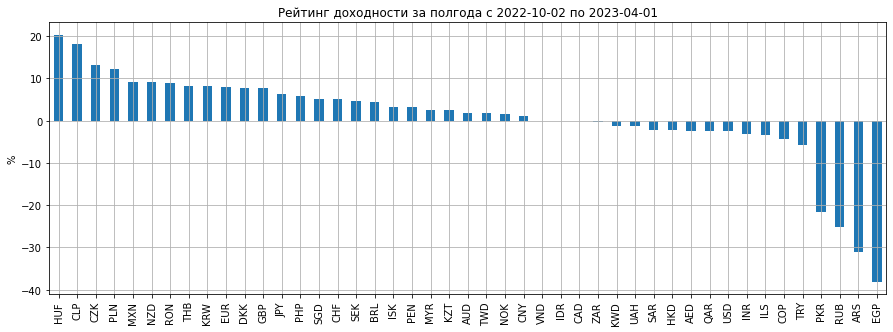

,%,Расшифровка,Ссылка на Wikipedia
HUF,20.366599,Венгерский форинт,Wikipedia link
CLP,18.181818,Чилийское песо,Wikipedia link
CZK,13.139549,Чешская крона,Wikipedia link
...,...,...,...
RUB,-25.169109,Российский рубль,Wikipedia link
ARS,-31.132731,Аргентинское песо,Wikipedia link
EGP,-38.097426,Египетский фунт,Wikipedia link


In [5]:
rep(182,"полгода")

# Один год
Относительное изменение (в процентах) абсолютных валютных курсов за год.

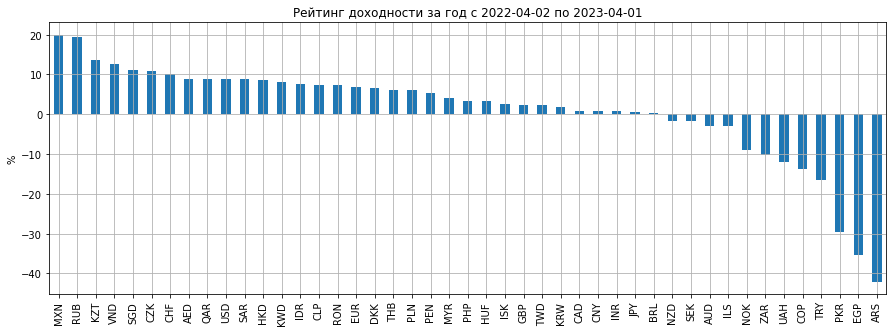

,%,Расшифровка,Ссылка на Wikipedia
MXN,20.004174,Мексиканское песо,Wikipedia link
RUB,19.379496,Российский рубль,Wikipedia link
KZT,13.715711,Казахстанский тенге,Wikipedia link
...,...,...,...
PKR,-29.604629,Пакистанская рупия,Wikipedia link
EGP,-35.401880,Египетский фунт,Wikipedia link
ARS,-42.080655,Аргентинское песо,Wikipedia link


In [6]:
rep(365,"год")

# 3 года
Относительное изменение (в процентах) абсолютных валютных курсов за три года.

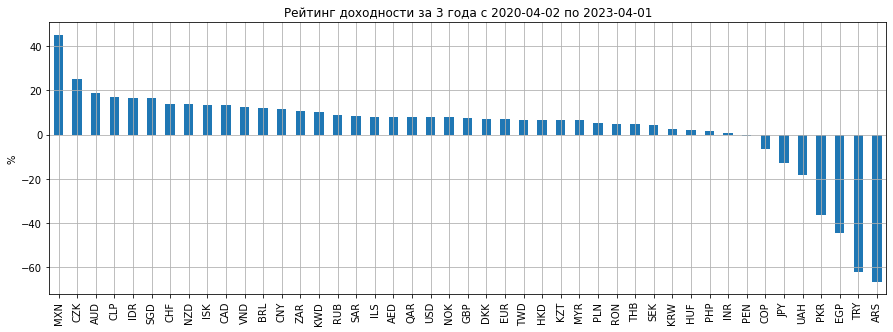

,%,Расшифровка,Ссылка на Wikipedia
MXN,45.330469,Мексиканское песо,Wikipedia link
CZK,25.376457,Чешская крона,Wikipedia link
AUD,18.739604,Австралийский доллар,Wikipedia link
...,...,...,...
EGP,-44.858359,Египетский фунт,Wikipedia link
TRY,-62.194866,Турецкая лира,Wikipedia link
ARS,-66.756122,Аргентинское песо,Wikipedia link


In [7]:
rep(365*3,"3 года")

# 5 лет
Относительное изменение (в процентах) абсолютных валютных курсов за пять лет.

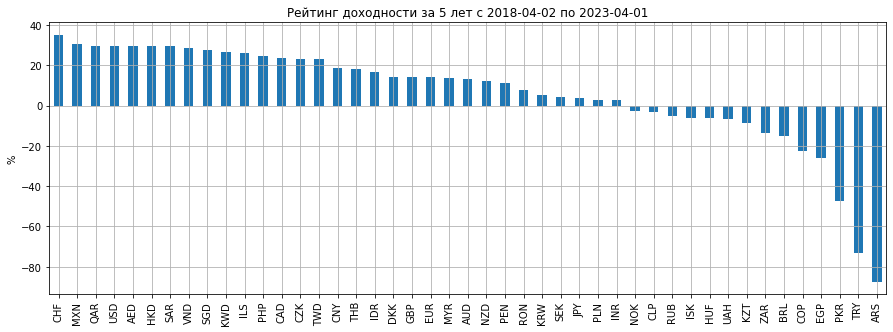

,%,Расшифровка,Ссылка на Wikipedia
CHF,35.233384,Швейцарский франк,Wikipedia link
MXN,30.756111,Мексиканское песо,Wikipedia link
QAR,29.785341,Катарский риал,Wikipedia link
...,...,...,...
PKR,-47.254335,Пакистанская рупия,Wikipedia link
TRY,-73.221363,Турецкая лира,Wikipedia link
ARS,-87.514174,Аргентинское песо,Wikipedia link


In [8]:
rep(365*5+1,"5 лет")

In [9]:
import numpy as np
try:
    num = np.random.randint(img_cnt)
    text = f"За {period[num]} более всего выросли абсолютные курсы таких валют как {tabs[num].data.iloc[0,1]}, {tabs[num].data.iloc[1,1]} и {tabs[num].data.iloc[2,1]}. Более всех потеряли абсолютной стоимости такие валюты как {tabs[num].data.iloc[-1,1]}, {tabs[num].data.iloc[-2,1]} и {tabs[num].data.iloc[-3,1]}."
    text += "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-reyting-dohod"
    img_file = str(num) + ".png"
    img_url = ap.post_to_imgbb(img_file)
    _=ap.send_photo_to_telegram(img_url,text)
except:
    print("Ошибки публикации")